In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from seabreeze.spectrometers import Spectrometer as Spec
from datetime import datetime
import csv
import logging
import epics
import yaml
import sys
sys.path.insert(0, '../../mCEAS/')
# import os
# print(os.listdir(..))
# os.chdir('drone_dori/mCEAS')

from calculation_functions import *
from MCEAS import *


In [2]:
with open('../../mCEAS/config/config_mCEAS_lab.yaml') as file: 
    config_data = yaml.load(file, Loader=yaml.FullLoader)

c = config_data["mCEAS"]

In [3]:
def init_mCEAS_from_config():
    mCEAS = MCEAS(arduino_port=c["arduino_port"],update_rate=c["update_rate"],is_demo_mode=c["is_demo_mode"],
                  default_log_dir=c["default_log_dir"],measured_gases_and_sigma_filenames=c["measured_gases_and_sigma_filenames"],
                  atmospheric_gases_and_sigma_filenames=c["atmospheric_gases_and_sigma_filenames"],d_full=c["d_full"],
                  d_purging=["d_purging"], R_filename=c["reflectivity_filename"], R_wavelengths_filename=c["reflectivity_wavelengths_filename"],
                  I0=c["I0_filename"],T0=c["T0"],P0=c["P0"],I0_NO2=c["I0_NO2"],
                  name_PV=c["name_PV"],spectrometer_name_PV=config_data["spectrometer"]["name_PV"],
                  measurement_gases=c["measurement_gases"],arduino_params=c["arduino_params"],to_log=c["to_log"],log_filename=c["log_filename"])
    return mCEAS

In [4]:
mCEAS =  init_mCEAS_from_config()

In [6]:
try:
    mCEAS.load_reflectivity()
except Exception as e:
    logging.info(f"{e}. Calculating and saving new reflectivity...")
    mCEAS.init_and_save_reflectivity(
        c["lab_reflectivity_Is1"],c["lab_reflectivity_Is2"],
        c["reflectivity_Ps1"],c["reflectivity_Ps2"],c["reflectivity_Ts1"],c["reflectivity_Ts2"],
        c["lab_reflectivity_names1"],c["lab_reflectivity_names2"]
    )

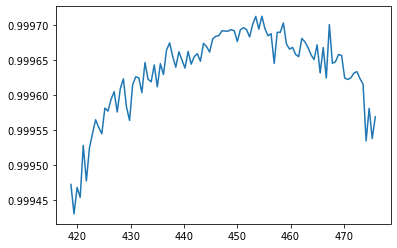

In [7]:
i_start,i_end = 375,475
plt.plot(mCEAS.wavelengths[i_start:i_end],mCEAS.R[i_start:i_end])

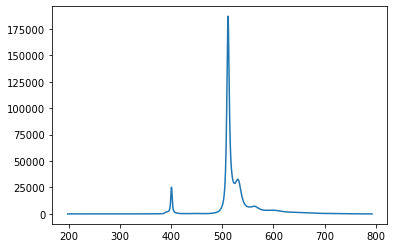

In [13]:
w,I = load_wavelengths_and_average_I_from_spectrometer_csv(filename=c["lab_reflectivity_Is1"][0])
plt.plot(w,I)

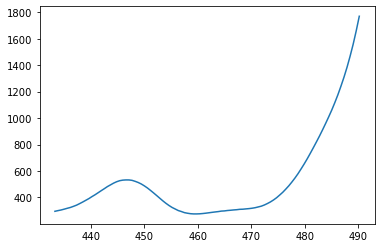

In [14]:
idx_begin,idx_stop = 400,500
plt.plot(w[idx_begin:idx_stop],I[idx_begin:idx_stop ])
